In [1]:
import os
import polars as pl

print(f"Polars version: {pl.__version__}")

folder_path = 'Textmine_Results'

expected_cols = [
    "sentence_id",
    "synfileid:synline",
    "matched_word",
    "startpos",
    "length",
    "synword",
    "exactmatchboolean",
    "prefix",
    "suffix",
    "exact-match"
]

csv_files = [f for f in os.listdir(folder_path) if f.endswith('.index')]
print(f"Files found: {csv_files}")

dfs = []
for file in csv_files:
    path = os.path.join(folder_path, file)
    
    # Check if the file is empty
    if os.path.getsize(path) == 0:
        print(f"Skipping empty file: {file}")
        continue # Skip to the next file in the loop
        
    try:
        df = pl.read_csv(path, separator='\t', has_header=False)
        # Check if the DataFrame read from the file is empty after reading
        if df.is_empty():
            print(f"Skipping file '{file}' as it resulted in an empty DataFrame after reading (might contain only header or be malformed).")
            continue
            
        df.columns = expected_cols
        dfs.append(df)
    except pl.NoDataError:
        print(f"Skipping file '{file}' due to NoDataError (could not parse data).")
    except Exception as e:
        print(f"An error occurred while processing file '{file}': {e}")
    
if dfs:
    big_df = pl.concat(dfs)
    print("\n--- Consolidated DataFrame ---")
    print(big_df)
else:
    print("No files were successfully processed and matched the expected column count.")

Polars version: 1.30.0
Files found: ['RSSsentences.index', '2025-06-30RSSsentences.index']

--- Consolidated DataFrame ---
shape: (3_013, 10)
┌────────────┬────────────┬────────────┬──────────┬───┬───────────┬────────┬───────────┬───────────┐
│ sentence_i ┆ synfileid: ┆ matched_wo ┆ startpos ┆ … ┆ exactmatc ┆ prefix ┆ suffix    ┆ exact-mat │
│ d          ┆ synline    ┆ rd         ┆ ---      ┆   ┆ hboolean  ┆ ---    ┆ ---       ┆ ch        │
│ ---        ┆ ---        ┆ ---        ┆ i64      ┆   ┆ ---       ┆ str    ┆ str       ┆ ---       │
│ str        ┆ str        ┆ str        ┆          ┆   ┆ bool      ┆        ┆           ┆ i64       │
╞════════════╪════════════╪════════════╪══════════╪═══╪═══════════╪════════╪═══════════╪═══════════╡
│ text2.1    ┆ 0:26       ┆ ageing     ┆ 41       ┆ … ┆ true      ┆ null   ┆ null      ┆ 0         │
│ text2.2    ┆ 0:26       ┆ ageing     ┆ 183      ┆ … ┆ true      ┆ null   ┆ null      ┆ 0         │
│ text3.1    ┆ 0:2        ┆ work       ┆ 31       

[nltk_data] Downloading package wordnet to /home/leo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/leo/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


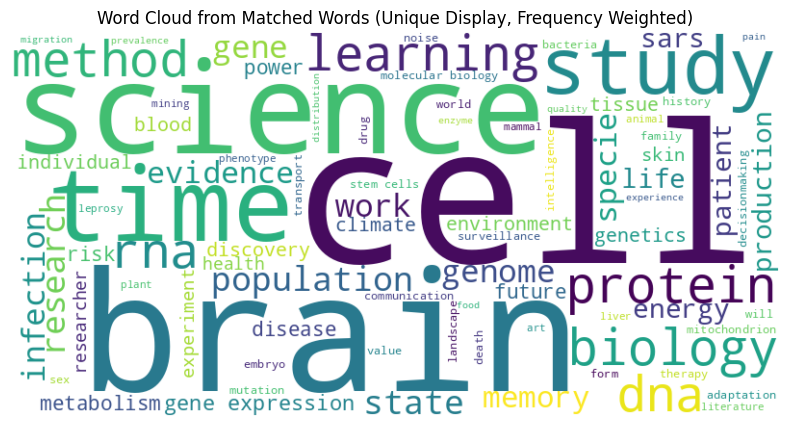

In [14]:
import os
import polars as pl
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import re
import nltk
from nltk.stem import WordNetLemmatizer
from collections import Counter

# Download required data
nltk.download('wordnet')
nltk.download('omw-1.4')

# Step 1: Extract and clean matched words
word_list = [
    x.strip().lower() if isinstance(x, str) else ""
    for x in big_df
        .select(pl.col("matched_word").cast(pl.Utf8).fill_null(""))
        .to_series()
        .to_list()
]

# Step 2: Remove punctuation/numbers
cleaned_words = [re.sub(r'[^a-z\s]', '', word) for word in word_list]

# Step 3: Lemmatize
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in cleaned_words if word]

# Step 4: Count word frequencies
word_freq = Counter(lemmatized_words)

# Step 5: Define stopwords
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(["null", "file", "index", "etc"])

# Step 6: Remove stopwords from frequency dict
filtered_freq = {
    word: freq for word, freq in word_freq.items()
    if word not in custom_stopwords and word.strip() != ""
}

# Step 7: Generate word cloud from frequency dictionary
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    min_font_size=10,
    stopwords=None,         # already removed manually
    collocations=False      # ensure each word appears once
).generate_from_frequencies(filtered_freq)

# Step 8: Plot
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud from Matched Words (Unique Display, Frequency Weighted)')
plt.show()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 22.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [8]:
import os
import polars as pl

print(f"Polars version: {pl.__version__}")

folder_path = 'Textmine_Results'

expected_cols = [
    "sentence_id",
    "synfileid:synline",
    "matched_word",
    "startpos",
    "length",
    "synword",
    "exactmatchboolean",
    "prefix",
    "suffix",
    "exact-match"
]

csv_files = [f for f in os.listdir(folder_path) if f.endswith('.index')]
print(f"Files found: {csv_files}")

dfs = []
for file in csv_files:
    path = os.path.join(folder_path, file)
    
    # Check if the file is empty
    if os.path.getsize(path) == 0:
        print(f"Skipping empty file: {file}")
        continue # Skip to the next file in the loop
        
    try:
        df = pl.read_csv(path, separator='\t', has_header=False)
        # Check if the DataFrame read from the file is empty after reading
        if df.is_empty():
            print(f"Skipping file '{file}' as it resulted in an empty DataFrame after reading (might contain only header or be malformed).")
            continue
            
        df.columns = expected_cols
        dfs.append(df)
    except pl.NoDataError:
        print(f"Skipping file '{file}' due to NoDataError (could not parse data).")
    except Exception as e:
        print(f"An error occurred while processing file '{file}': {e}")
    
if dfs:
    big_df = pl.concat(dfs)
    print("\n--- Consolidated DataFrame ---")
    print(big_df)
else:
    print("No files were successfully processed and matched the expected column count.")

Polars version: 1.30.0
Files found: ['RSSsentences.index']

--- Consolidated DataFrame ---
shape: (1_504, 10)
┌─────────────┬────────────┬────────────┬──────────┬───┬────────────┬────────┬────────┬────────────┐
│ sentence_id ┆ synfileid: ┆ matched_wo ┆ startpos ┆ … ┆ exactmatch ┆ prefix ┆ suffix ┆ exact-matc │
│ ---         ┆ synline    ┆ rd         ┆ ---      ┆   ┆ boolean    ┆ ---    ┆ ---    ┆ h          │
│ str         ┆ ---        ┆ ---        ┆ i64      ┆   ┆ ---        ┆ str    ┆ str    ┆ ---        │
│             ┆ str        ┆ str        ┆          ┆   ┆ bool       ┆        ┆        ┆ i64        │
╞═════════════╪════════════╪════════════╪══════════╪═══╪════════════╪════════╪════════╪════════════╡
│ text2.1     ┆ 0:26       ┆ ageing     ┆ 41       ┆ … ┆ true       ┆ null   ┆ null   ┆ 0          │
│ text2.2     ┆ 0:26       ┆ ageing     ┆ 183      ┆ … ┆ true       ┆ null   ┆ null   ┆ 0          │
│ text3.1     ┆ 0:2        ┆ work       ┆ 31       ┆ … ┆ true       ┆ null   ┆ nul

In [9]:
import json

# Load the nested dict structure
with open('thesaurus_supergroup_hierarchy.json', 'r', encoding='utf-8') as f:
    supergroup_data = json.load(f)

# Create a keyword → highest descriptor mapping
keyword_to_descriptor = {}

for _, descriptors in supergroup_data.items():
    for descriptor, narrower_terms in descriptors.items():
        descriptor_lc = descriptor.lower()
        keyword_to_descriptor[descriptor_lc] = descriptor  # map descriptor to itself
        for nt in narrower_terms:
            keyword_to_descriptor[nt.lower()] = descriptor  # map narrower term to its descriptor

# Now keyword_to_descriptor[word.lower()] gives you the highest descriptor


In [11]:
# Funktion zur Zuordnung
def map_to_category(word):
    return keyword_to_descriptor.get(word.lower())

# Spalte "category" anhand der gematchten Wörter erzeugen
df = df.with_columns(
    pl.col("matched_word").map_elements(map_to_category).alias("category")
)
print(df)
# Kategorien zählen und sortieren
df_counts = (
    df.drop_nulls("category")
      .group_by("category")
      .agg(pl.count().alias("count"))
      .sort("count", descending=True)
)

# Ausgabe
print(df_counts)


shape: (1_504, 11)
┌─────────────┬────────────┬────────────┬──────────┬───┬────────┬────────┬────────────┬────────────┐
│ sentence_id ┆ synfileid: ┆ matched_wo ┆ startpos ┆ … ┆ prefix ┆ suffix ┆ exact-matc ┆ category   │
│ ---         ┆ synline    ┆ rd         ┆ ---      ┆   ┆ ---    ┆ ---    ┆ h          ┆ ---        │
│ str         ┆ ---        ┆ ---        ┆ i64      ┆   ┆ str    ┆ str    ┆ ---        ┆ str        │
│             ┆ str        ┆ str        ┆          ┆   ┆        ┆        ┆ i64        ┆            │
╞═════════════╪════════════╪════════════╪══════════╪═══╪════════╪════════╪════════════╪════════════╡
│ text2.1     ┆ 0:26       ┆ ageing     ┆ 41       ┆ … ┆ null   ┆ null   ┆ 0          ┆ biology    │
│ text2.2     ┆ 0:26       ┆ ageing     ┆ 183      ┆ … ┆ null   ┆ null   ┆ 0          ┆ biology    │
│ text3.1     ┆ 0:2        ┆ work       ┆ 31       ┆ … ┆ null   ┆ null   ┆ 0          ┆ economics  │
│ text3.2     ┆ 0:2        ┆ work       ┆ 173      ┆ … ┆ null   ┆ null  

/tmp/ipykernel_19994/2688708339.py:6: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  df = df.with_columns(
/tmp/ipykernel_19994/2688708339.py:14: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  .agg(pl.count().alias("count"))


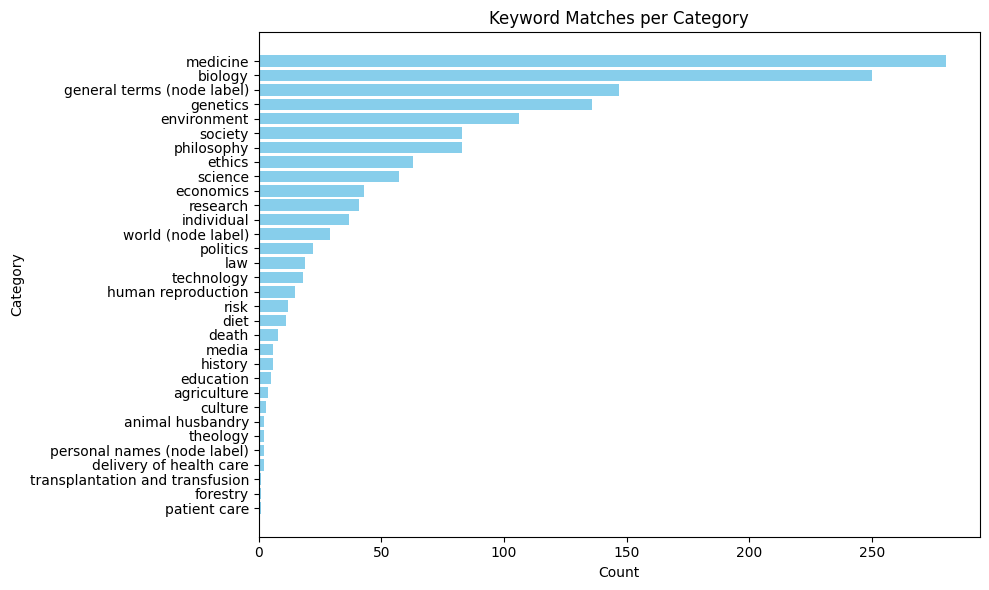

In [34]:
plt.figure(figsize=(10, 6))
plt.barh(df_counts["category"], df_counts["count"], color="skyblue")
plt.xlabel("Count")
plt.ylabel("Category")
plt.title("Keyword Matches per Category")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()